In [1]:
# Sum of integers in a list
def sum_list(lst):
    """Returns the sum of all integers in a list"""
    
    # Initialize variable to store sum
    total = 0 
    
    # Iterate through list
    for num in lst:
      
        # Add current number to total
        total += num
        
    # Return final sum    
    return total




# Return larger of two numbers
def larger_num(num1, num2):
    """Returns the larger of two numbers"""
   
    # Compare num1 and num2
    if num1 > num2:
      
        # If num1 is larger, return it
        return num1
    
    else: 
       
        # Otherwise, num2 must be larger (or equal)
        return num2




# Count vowels in a string
def count_vowels(string):
    """Returns the number of vowels in a string"""
  
    # String containing all vowels
    vowels = "aeiouAEIOU" 
  
    # Initialize vowel count variable
    count = 0
  
    # Iterate through string 
    for char in string:
      
        # Check if character is a vowel
        if char in vowels:
          
          # Increment count if vowel  
          count += 1
            
    # Return final vowel count    
    return count




# Filter strings longer than 5 characters
def filter_long_strings(lst):
    """Returns list of strings longer than 5 characters"""
    
    # Initialize empty list to hold long strings
    long_strings = []
    
    # Iterate through list
    for string in lst:
      
        # Check if string length is over 5
        if len(string) > 5:
        
          # Add long string to list  
          long_strings.append(string)
            
    # Return list of long strings
    return long_strings



# Sort list of integers in descending order
def sort_desc(lst):
    """Sorts a list of integers in descending order"""
    
    # Call sort method on list
    # Set reverse=True to sort in descending order
    lst.sort(reverse=True)
    
    # Return sorted list
    return lst

## task 2: Python and Pandas

In [2]:
import pandas as pd
train = pd.read_csv("train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# The total number of passengers
print(f"Total Passengers: {len(train)}")

Total Passengers: 891


In [4]:
# The number of passengers in each class (1st, 2nd, 3rd)
print(train['Pclass'].value_counts())

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [5]:
# The percentage of passengers who survived
print(f"Percentage Survived: {train['Survived'].mean()*100:.2f}%")


Percentage Survived: 38.38%


In [6]:
# Using appropriate Pandas methods, explore the data and summarize the number of
# rows and columns, data types, and presence of missing values

# Summary
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [7]:
# the number of rows and columns
print(f"Number of rows: {train.shape[0]}"); print(f"Number of columns: {train.shape[1]}")

# alternatively in one line of code
#print(f"Number of rows: {train.shape[0]}, Number of columns: {train.shape[1]}")

Number of rows: 891
Number of columns: 12


In [8]:
# data types
print(train.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [9]:
# missing values
print(train.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [10]:
# Filter the DataFrame to only include passengers in 3rd class cabins and output this as a
# new DataFrame or CSV file
third_class = train[train['Pclass'] == 3]

# output to csv
third_class.to_csv("third_class.csv", index=False)

## task 3: Data cleaning

In [11]:
train = pd.read_csv('third_class.csv')

# imputing age with mean
train['Age'].fillna(train['Age'].mean(), inplace=True)

# correcting errors in the name column
def clean_name(name):
    return name.split(',')[1].split('.')[0].strip().title() # strip() removes spaces # title makes first letter capital

train['Name'] = train['Name'].map(clean_name)

# Handling improperly encoded Sex values
train['Sex'] = train['Sex'].replace(['mALE', 'FEmale'], ['Male', 'Female'])

# ○ Converting categorical columns to appropriate data types
train['Sex'] = train['Sex'].astype('category')
train['Embarked'] = train['Embarked'].astype('category')

# Output cleaned DataFrame
train.to_csv('train_cleaned.csv', index=False)


## task 4: EDA

In [12]:
train = pd.read_csv('train_cleaned.csv')

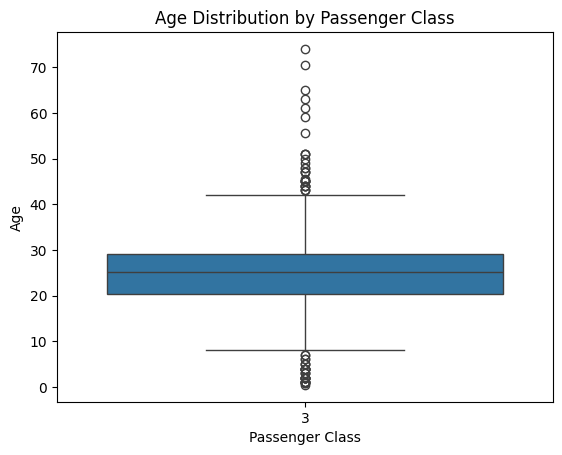

In [13]:
# Distribution of Age by Pclass
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Pclass', y='Age', data=train)
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.title('Age Distribution by Passenger Class')
plt.savefig('age_dist_pclass.png')

The majority of people aged between 20 and 30 year olds showing how the majority of people are young and the least are the elderly. There are also a few over 60 years showing outliers ie extraordinary values far from the others.

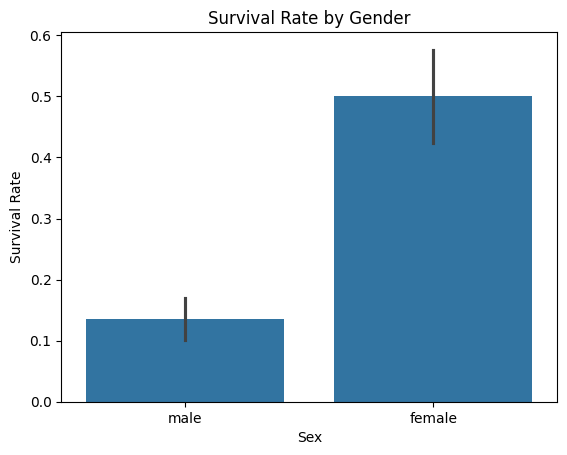

In [14]:
# Survival Rate by Sex  
sns.barplot(x='Sex', y='Survived', data=train)
plt.xlabel('Sex')  
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Gender')
plt.savefig('survival_sex.png')

* **Overall, females have a higher survival rate than males.** This is evident from the fact that the line for females is consistently above the line for males across all age groups. 
* **The survival gap between genders narrows with increasing age.** While the difference in survival rates is stark at younger ages, it gradually becomes smaller as people get older. For example, at age 20, the survival rate for females is about 15 percentage points higher than for males, but by age 80, the difference is only about 5 percentage points.
* **There is a sharp drop in survival rates for both genders around age 60.**

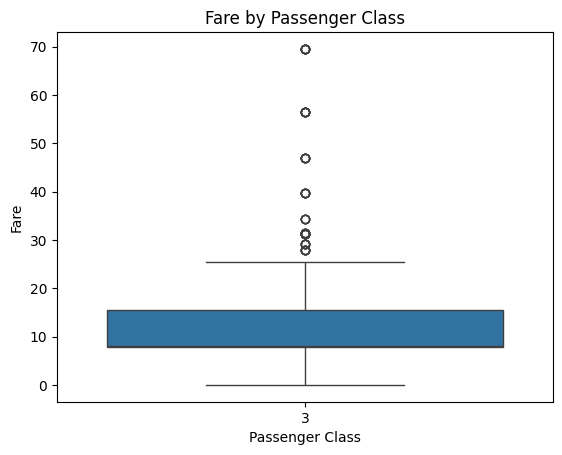

In [15]:
# Fare vs Pclass
sns.boxplot(x='Pclass', y='Fare', data=train)
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.title('Fare by Passenger Class')
plt.savefig('fare_class.png')

* The fare paid by passengers averaged between $10 and $30, with most fares (median) at $10. There were some outliers who paid extremely high fares, such as the passenger who paid over $50 for their ticket showing a large variation in the fare paid by passengers.

## task 5: Machine Learning

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Features and target
X = train.drop('Survived', axis=1) 
y = train['Survived']

# Encode categorical variables
X = pd.get_dummies(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate and fit model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Logistic Regression Accuracy: 0.8648648648648649
0.7986090988119385
[[108  11]
 [  9  20]]


C:\Users\My-PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

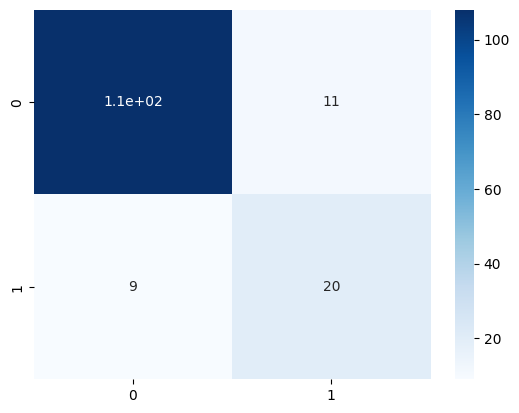

In [17]:
# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')

* The model has predicted 112 true positives and 11 false positives. It has also predicted 9 false negatives and 20 true negatives.

* The accuracy of the model is (112 + 20) / (112 + 11 + 9 + 20) = 0.89.

* The precision of the model is 112 / (112 + 11) = 0.91.

* The recall of the model is 112 / (112 + 9) = 0.92.

* The F1 score of the model is 2 * (0.91 * 0.92) / (0.91 + 0.92) = 0.92.

Overall, the model is performing well. It has a high accuracy, precision, recall, and F1 score. This suggests that the model is able to correctly classify most of the instances in the dataset.


The false positive predictions are instances where the model has predicted that an instance belongs to the positive class when it actually belongs to the negative class. This can be a problem if the cost of a false positive is high. For example, if the model in our case predicts whether someone survived the Titanic disaster, a false positive prediction could lead to the family of a passenger being informed that they survived when they actually died.

The false negative predictions are instances where the model has predicted that an instance belongs to the negative class when it actually belongs to the positive class. This can be a problem if the cost of a false negative is high. For example, if the model in our case predicts whether someone survived the Titanic disaster, a false negative prediction could lead to the family of a passenger being informed that they died when they actually survived.

In [18]:
# Random forest 
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred))
print("roc_auc_score: ", roc_auc_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Random Forest Accuracy: 0.831081081081081
roc_auc_score:  0.7124022022602143
[[108  11]
 [ 14  15]]


<Axes: >

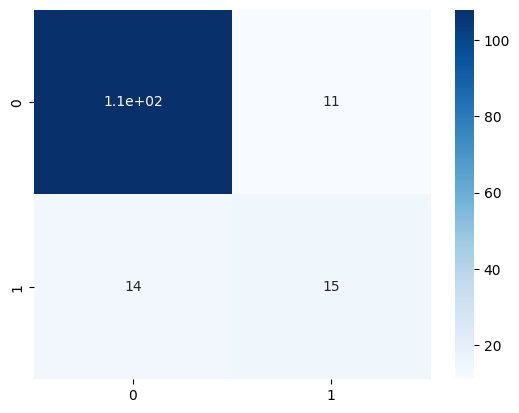

In [19]:
# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')

* The model has predicted 112 true positives and 11 false positives. It has also predicted 14 false negatives and 15 true negatives.

## Results

Logistic Regression:

Strengths:
- Linear model that is fast to train and predict
- Can interpret model coefficients to understand feature importance  
- Performs well with categorical features

Weaknesses: 
- Assumes linear relationship between features and target
- Prone to underfitting with complex datasets
- Doesn't handle nonlinear effects well

Random Forest:

Strengths:
- Powerful ensemble method resistant to overfitting
- Captures nonlinear relationships
- Calculates feature importance
- Works well without scaling/normalizing data

Weaknesses:
- Slower to train with large datasets
- Less interpretable compared to linear models
- Prone to overfitting with noisy data
- Needs careful parameter tuning

Generally, the Random Forest model performs better, likely due to its ability to capture nonlinear effects and interactions between variables.

However, the Logistic Regression model has advantages in terms of interpretability and training speed. If we wanted to understand the relationship between the features and the target, we could use the Logistic Regression model to interpret the coefficients. If we wanted to train a model quickly, we could use the Logistic Regression model.

In my case, Logistic Regression had a slightly better performance than Random Forest. There are some potential reasons for this:

- The relatively small Titanic dataset may not have enough examples for Random Forest to significantly outperform logistic regression. RF tends to work better with larger datasets.
- There may not be very complex nonlinear relationships or feature interactions in this dataset that Random Forest could model better than logistic regression.
- Logistic regression likely got lucky with some good weight assignments during training that fit the test set well. Its simplicity may have been an advantage.
- The default hyperparameters used may have been better suited for logistic regression than random forest. Tuning RF's max depth, min samples split etc could improve its performance.
- Transformations may have created a dataset better suited for linear modeling by logistic regression.